In [2]:
import pandas as pd
import numpy as np

import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    
    import Plib.DataFarm.FRData as fr
    import Plib.Plotting.Timing as pt
    import Plib.Signals.FAnalysis as fa
    import Plib.Utils.Tools as tl
    import Plib.Portfolio.Indexes as pi


### Define Fundamental Criterion

In [22]:
myselFunction = lambda s: fr.getRatios(s)[['MarketCapitalization']]    
myrankFunction = fa.getTopNTickers

myselFunction = fa.getNetPayout        
#myselFunction = fa.getProfitability 
myrankFunction = fa.getTopNTickers2


### Obtain data

In [23]:
dwld=False
fn1='fund_prof.pkl'
fn2='fund_hist.pkl'
fn3='fund_hist2.pkl'
dt_end='2022-08-14'
dt_start = '2010-01-01'

if dwld:
    fdata=tl.rpkl(fn1)
    fdata=fr.getFundDataMarket(last_reporting='2022-04-30', selFunc=myselFunction, debug=True)
    tl.wpkl(fn1, fdata)
    tickers_stocks=list(fr.getTickers('stock').Tickers.values)
    tickers=[t for t in list(fdata.keys()) if t in tickers_stocks]
    stocks=pt.getHistComp(tickers, dt_start, dt_end, provider='frdata')
    tl.wpkl(fn2, stocks)
else:
    fdata=tl.rpkl(fn1)
    stocks=tl.rpkl(fn2)

### Compute index

In [24]:
SP500EW=fa.getIndex(stocks, fdata,qmax='2022-07-31',qmin='2010-01-31',
                    iname='SP500', Z=5, top=50, selfunction=myrankFunction, lbl='MarketCapitalization')


/Users/rob/Desktop/PythonCode/Plib/Signals/FAnalysis.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mysel['test']=mysel['MarketCapitalization']/mysel['MarketCapitalization']
/Users/rob/Desktop/PythonCode/Plib/Signals/FAnalysis.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['index']['Quarter'][ stocks['index'].index > quarters[-1] ] = str(quarters[-1])


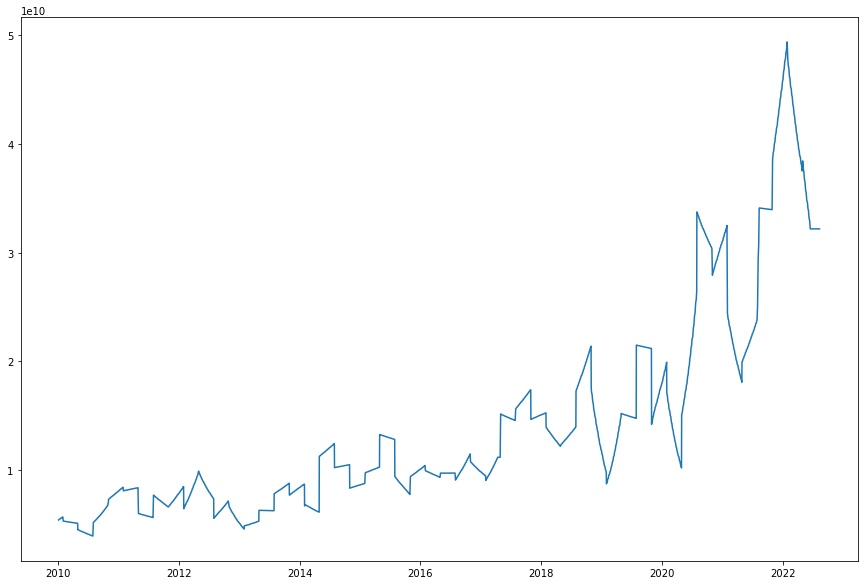

In [25]:
SP500EW['SP500 - (Equal Weight)'].plot(figsize=(15,10))

In [26]:
SP500EW

SP500 - (Equal Weight)   Divisor
2010-01-04            5.429741e+09  0.864394
2010-01-05            5.445994e+09  0.866177
2010-01-06            5.462180e+09  0.867959
2010-01-07            5.478299e+09  0.869741
2010-01-08            5.494353e+09  0.871524
...                            ...       ...
2022-08-08            3.217649e+10  1.179881
2022-08-09            3.217649e+10  1.179881
2022-08-10            3.217649e+10  1.179881
2022-08-11            3.217649e+10  1.179881
2022-08-12            3.217649e+10  1.179881

[3175 rows x 2 columns]

# Momentum and Value Portfolios 

In [3]:
tickers=list(fr.getTickers('fund').Tickers.values)
tickers=[t for t in tickers if not ((str(t).find('-')>0) or (str(t).find('_')>0) or (str(t).find('.')>0))]

In [4]:
rv_dataframe=pi.prepareValueData(tickers)
value_port = pi.getValueStockQty(rv_dataframe.copy(), 850000)
pd.to_pickle(value_port,'value.pkl')
value_port.head(10)

Ticker    Price  Number of Shares to Buy  Price-to-Earnings Ratio  \
0   TAST   2.0000                     8500                -1.016827   
1   AGNC  12.4500                     1365                -3.355434   
2   FOSL  10.8000                     1574                -3.456350   
3   EVFM   0.2275                    74725                -0.061773   
4    UIS  18.5300                      917               -11.851836   
5     YI   2.2000                     7727                -3.282960   
6   NCMI   2.4500                     6938               -26.767942   
7   CALA   0.3132                    54278                -0.572842   
8   RMTI   0.3900                    43589                -0.140177   
9    REV   7.7100                     2204                -0.270760   

   PE Percentile  Price-to-Book Ratio  PB Percentile  Price-to-Sales Ratio  \
0       0.267050             0.618058       0.167482              0.000000   
1       0.214101             0.724507       0.189640            -14.070130   
2       0.211799             0.663788       0.177266              0.710475   
3       0.298129            -0.141935       0.056403              0.000000   
4       0.126619            -5.507239       0.031655              0.000000   
5       0.215252            -5.690071       0.031367              0.485817   
6       0.076259            -0.173778       0.055252              1.116993   
7       0.284892           -10.108760       0.023885              0.000000   
8       0.297554            -0.835403       0.049496              0.249056   
9       0.293813            -0.127113       0.056691              0.674392   

   PS Percentile    EV/EBITDA  EV/EBITDA Percentile       EV/GP  \
0       0.060144  -356.775480              0.021871   -6.026571   
1       0.002590   -14.197836              0.137842  -11.798202   
2       0.143885  -700.174190              0.011799    2.934636   
3       0.060144    -1.102658              0.199424 -106.234496   
4       0.060144    14.851058              0.401439   -3.075336   
5       0.132086   -11.296726              0.148489    6.287348   
6       0.168921 -1403.062799              0.008633   16.728021   
7       0.060144     0.745235              0.305036        -inf   
8       0.123453    -3.335644              0.184748  -25.310155   
9       0.142158   -19.704608              0.121439    2.314036   

   EV/GP Percentile  RV Score  
0          0.040576  0.111424  
1          0.037986  0.116432  
2          0.092662  0.127482  
3          0.027914  0.128403  
4          0.042878  0.132547  
5          0.143597  0.134158  
6          0.368058  0.135424  
7          0.008058  0.136403  
8          0.035971  0.138245  
9          0.084029  0.139626

In [5]:
hqm_dataframe=pi.prepareMomData(tickers)
mom_port = pi.getMomentumStockQty(hqm_dataframe.copy(), 850000)
pd.to_pickle(mom_port,'momtm.pkl')
mom_port.head(10)

Ticker   Price    Market Cap  One-Year Price Return  \
0      A  126.44  0.000000e+00              -0.060135   
1     AA   87.82  8.318331e+06               1.623066   
2    AAL   19.00  8.246387e+06              -0.059871   
3    AAN   21.38  4.485329e+05              -0.119802   
4   AAOI    3.03  4.279909e+04              -0.621250   
5   AAON   51.98  2.907498e+06              -0.254018   
6    AAP  218.68  1.348165e+07               0.094111   
7   AAPL  165.00  2.289643e+09               0.251137   
8    AAT   36.09  1.783195e+06               0.069967   
9   AAWW   68.45  1.742876e+06               0.036336   

   One-Year Return Percentile  Six-Month Price Return  \
0                    0.477986               -0.067327   
1                    0.947626                0.045352   
2                    0.478849                0.145959   
3                    0.401727                0.016160   
4                    0.090072               -0.038065   
5                    0.269928               -0.000192   
6                    0.671942                0.005056   
7                    0.796547               -0.028040   
8                    0.649209                0.008382   
9                    0.610072                0.034769   

   Six-Month Return Percentile  Three-Month Price Return  \
0                     0.101007                 -0.014420   
1                     0.883453                  0.004576   
2                     0.988201                  0.000000   
3                     0.721439                 -0.006967   
4                     0.203741                 -0.019417   
5                     0.519424                 -0.006688   
6                     0.605468                 -0.014422   
7                     0.258417                 -0.031690   
8                     0.646043                 -0.000831   
9                     0.839424                  0.001903   

   Three-Month Return Percentile  One-Month Price Return  \
0                       0.305324               -0.091144   
1                       0.730072                0.067720   
2                       0.602878                0.135684   
3                       0.435971               -0.077653   
4                       0.239712               -0.160665   
5                       0.443741               -0.109932   
6                       0.305036                0.050437   
7                       0.136691                0.004016   
8                       0.568633               -0.026961   
9                       0.669353               -0.223835   

   One-Month Return Percentile  HQM Score  Number of Shares to Buy  
0                     0.258993   0.285827                    131.0  
1                     0.828489   0.847410                    189.0  
2                     0.929496   0.749856                    877.0  
3                     0.307914   0.466763                    779.0  
4                     0.104460   0.159496                   5500.0  
5                     0.200288   0.358345                    320.0  
6                     0.786475   0.592230                     76.0  
7                     0.645468   0.459281                    101.0  
8                     0.501295   0.591295                    461.0  
9                     0.048058   0.541727                    243.0